In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

In [2]:
data = pd.read_csv('data_with_clusters.csv')
data.drop('Unnamed: 0', axis = 1, inplace=True)
data.head()

,pays,ados_non-scol,enfants_non-scol,inscriptions_ens_sup,inscriptions_primaire,inscriptions_préscol,inscriptions_secondaire,ratio_ens_sup,ratio_primaire,ratio_secondaire,...,pop_active_avec_diplome,tx_emploi_15+,tx_actifs_15-24,epargne_brute(PIB),epargne_interieure_brute,cluster_km,cluster_km_2,cluster_km_5,cluster_ddg,cluster_db
0,Afghanistan,7.781353,3.996940,4.619342,94.895554,3.080470,39.700971,0.294833,0.599088,0.442298,...,49.745001,49.372499,45.339999,20.896559,19.719900,0,1,4,1,-1
1,Afrique du Sud,13.785806,7.176252,20.994972,104.268580,22.914647,94.457259,1.296527,0.963646,1.068906,...,43.265556,38.091579,27.254737,16.371788,19.719900,3,0,1,2,-1
2,Albanie,4.755447,6.472873,41.650427,100.335247,66.300319,86.715374,1.308677,1.016700,0.982993,...,45.808462,47.963571,34.666428,21.311708,9.391536,3,0,3,2,0
3,Algérie,7.781353,2.718592,29.798487,111.345440,35.694609,80.699898,1.299649,0.938633,1.063733,...,52.174000,34.886250,25.401429,47.290134,45.964392,3,0,1,2,0
4,Allemagne,2.639915,2.280481,67.467917,102.896194,108.693307,101.335926,0.985777,0.995832,0.959991,...,38.054737,55.450000,50.402631,26.247102,26.142249,1,0,0,2,0


## Analyse des groupes obtenus par K-Means

### Avec K = 2

In [3]:
data.groupby(['cluster_km_2']).describe().T

cluster_km_2                  0          1
ados_non-scol count  142.000000  62.000000
              mean     6.644390  29.819591
              std      5.316677  19.226455
              min      0.061662   4.413385
              25%      2.099118  11.972812
...                         ...        ...
cluster_db    min     -1.000000  -1.000000
              25%      0.000000  -1.000000
              50%      0.000000   0.000000
              75%      0.000000   0.000000
              max      0.000000   1.000000

[232 rows x 2 columns]

In [4]:
cols = data.columns.to_list()
cols.pop(0)
cols.pop(-1)
cols.pop(-1)
cols.pop(-1)

'cluster_km_5'

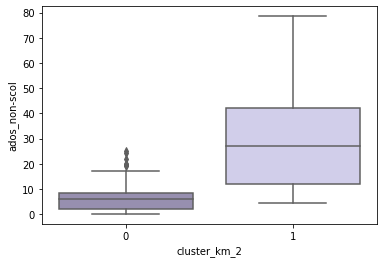

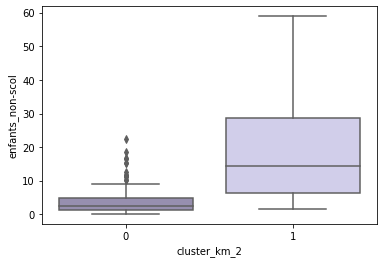

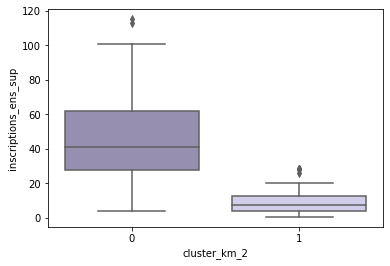

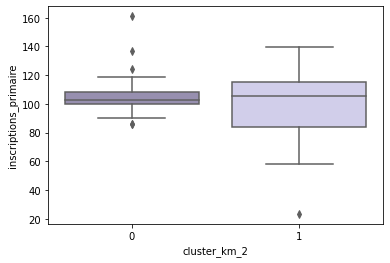

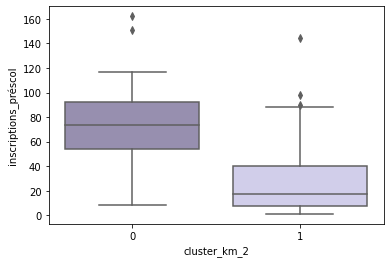

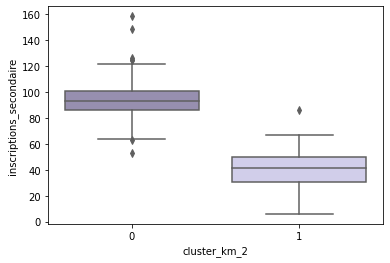

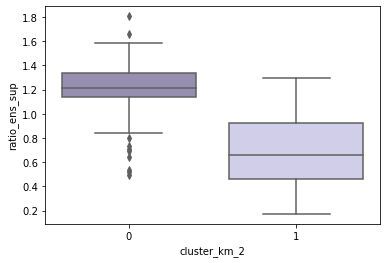

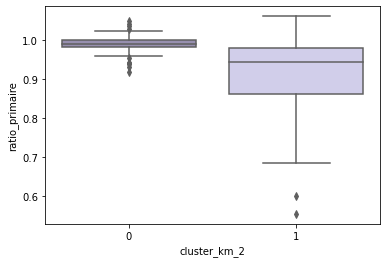

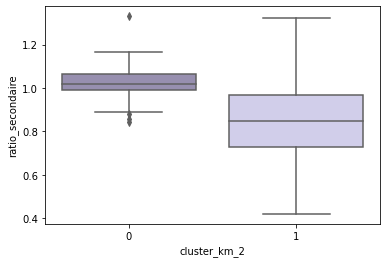

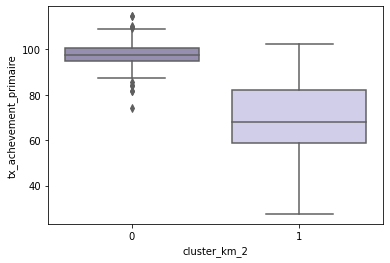

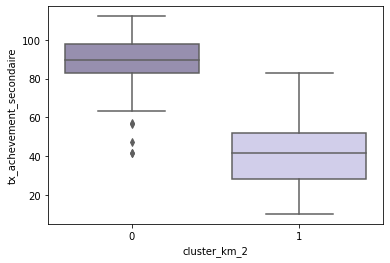

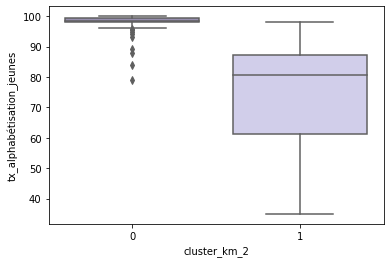

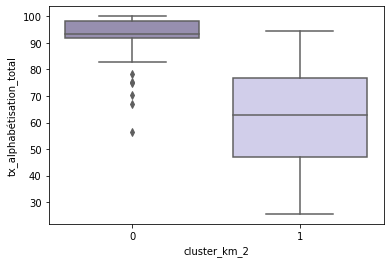

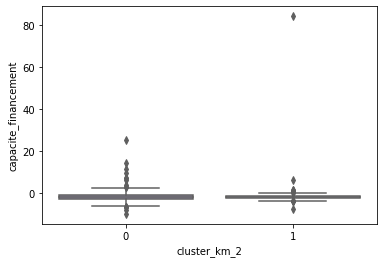

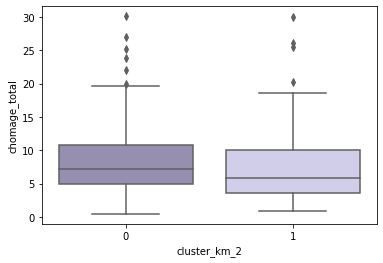

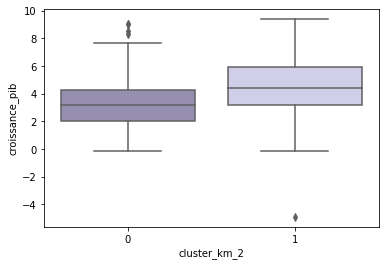

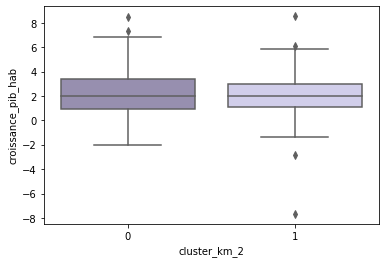

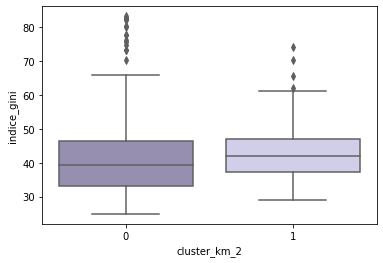

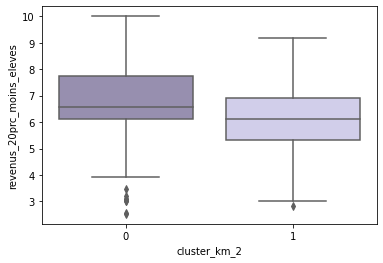

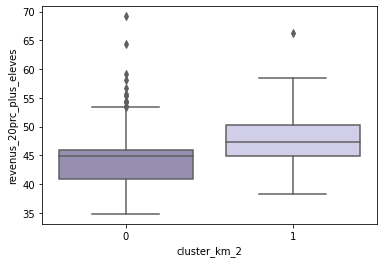

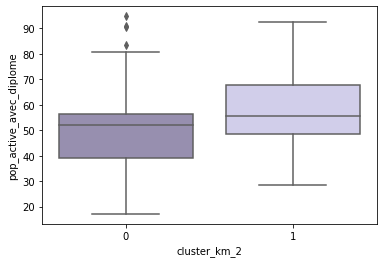

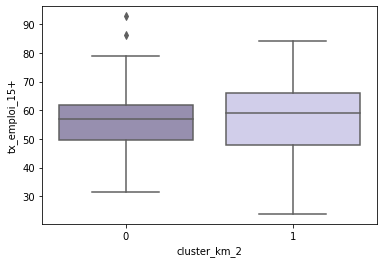

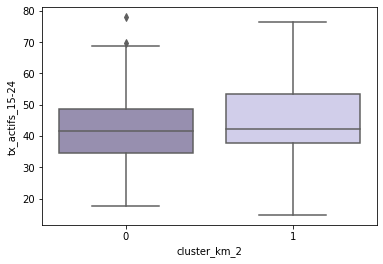

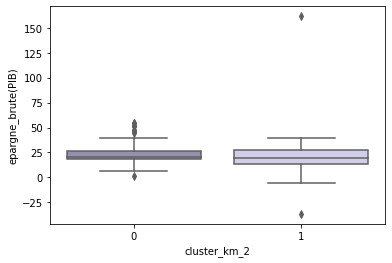

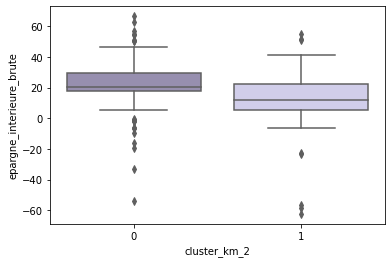

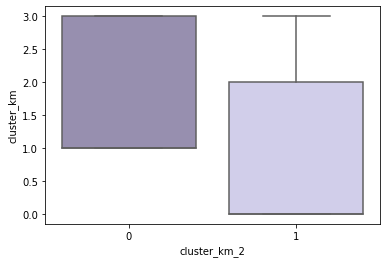

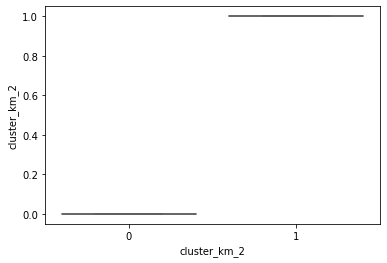

In [5]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#cdc9ef"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_km_2', y = i, data = data)
    plt.show()

In [6]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 1][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=108.88801135719496, pvalue=1.7171886673713799e-25)
Test de Student : Ttest_indResult(statistic=14.402938583305328, pvalue=2.014312904724946e-27)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=134.87107054174678, pvalue=3.5232004155958074e-31)
Test de Student : Ttest_indResult(statistic=11.388347843976694, pvalue=1.583576033727211e-20)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=64.324486320218, pvalue=1.0552607661140242e-15)
Test de Student : Ttest_indResult(statistic=-11.917728888230792, pvalue=9.296349638776273e-22)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=82.50432308497034, pvalue=1.0543927139831517e-19)
Test de Student : Ttest_indResult(statistic=-2.697955086560497, pvalue=0.008036599419954406)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=2.8849189683607834, pvalue=0.08941250460308668)
Test de Student : Ttest_indResult(statistic=-24.5135774853369

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


### Avec K = 4

In [7]:
data.groupby(['cluster_km']).describe().T

cluster_km                   0          1          2          3
ados_non-scol count  40.000000  76.000000  21.000000  67.000000
              mean   37.537437   4.559694  17.397480   8.640846
              std    19.102825   4.367553   8.496733   4.810286
              min     7.781353   0.061662   4.413385   0.391789
              25%    25.675903   1.388818  10.813036   5.989805
...                        ...        ...        ...        ...
cluster_db    min    -1.000000  -1.000000  -1.000000  -1.000000
              25%    -1.000000   0.000000  -1.000000   0.000000
              50%     0.000000   0.000000   0.000000   0.000000
              75%     1.000000   0.000000   0.000000   0.000000
              max     1.000000   0.000000   0.000000   0.000000

[232 rows x 4 columns]

In [8]:
cols = data.columns.to_list()
cols.pop(0)
cols.pop(-1)
cols.pop(-1)
cols.pop(-1)

'cluster_km_5'

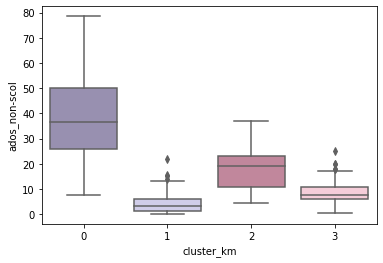

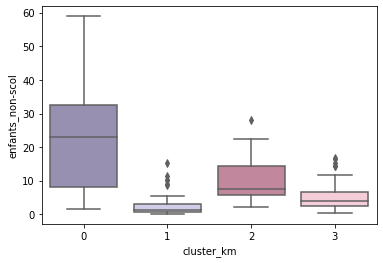

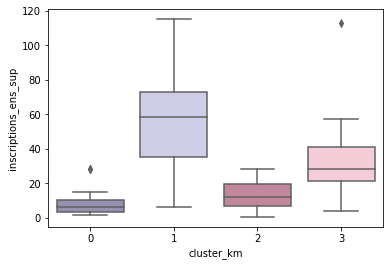

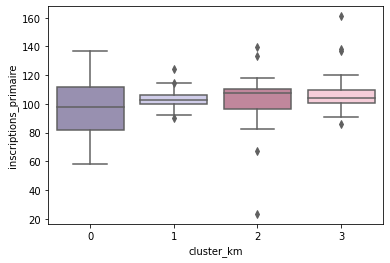

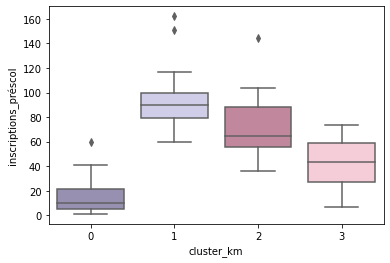

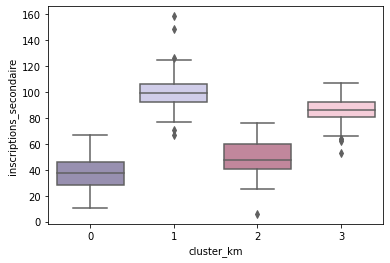

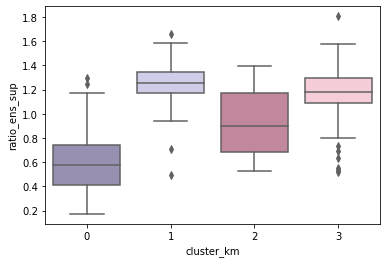

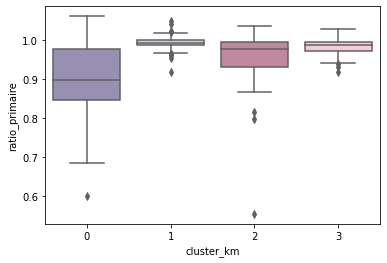

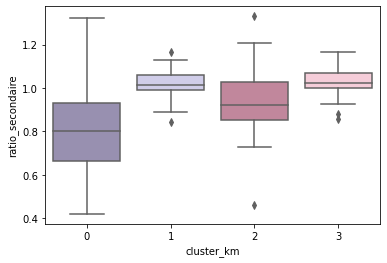

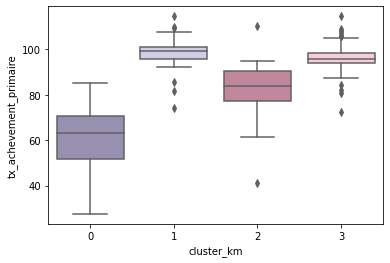

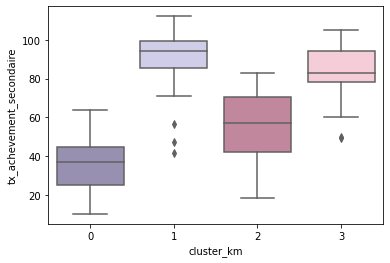

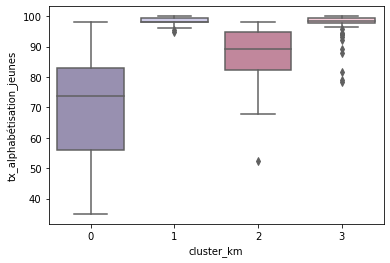

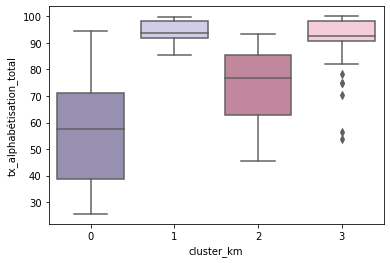

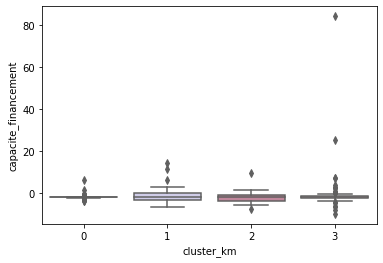

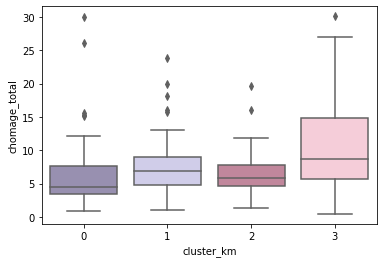

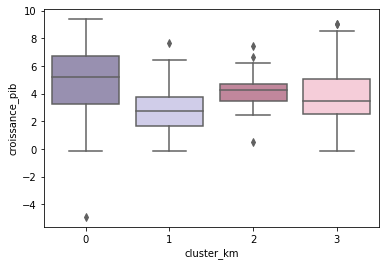

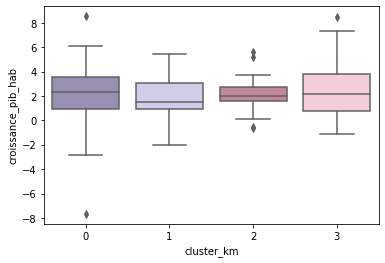

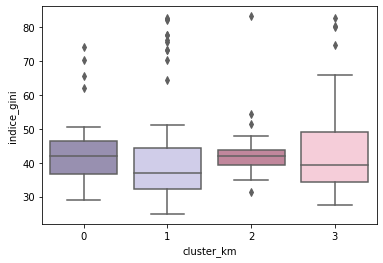

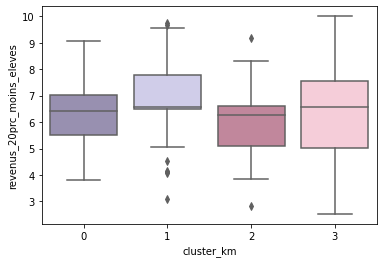

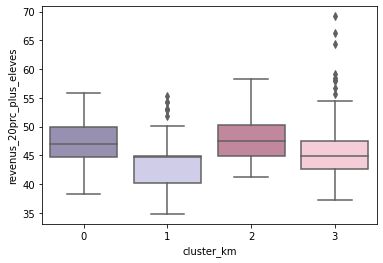

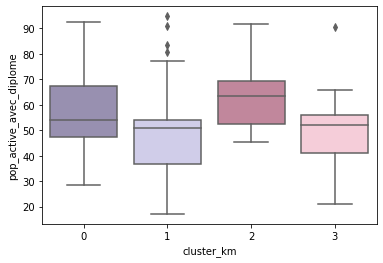

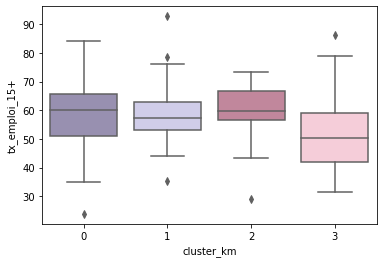

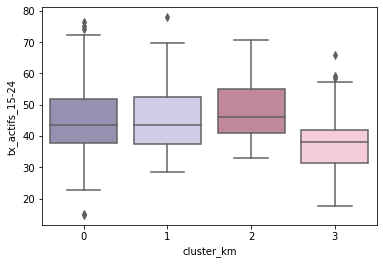

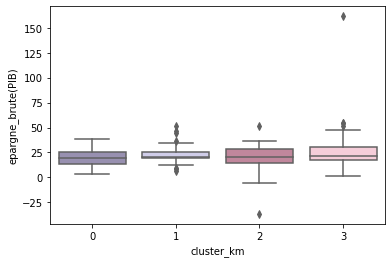

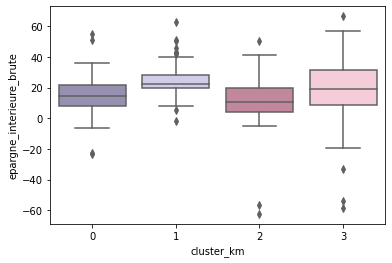

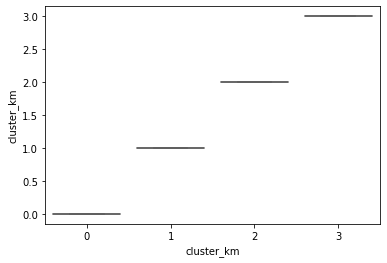

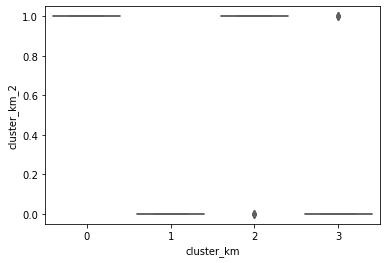

In [9]:
# Create an array with the colors you want to use
colors = ["#958bb5", "#ccc8ee","#cb7d9a", "#fbc7d6"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_km', y = i, data = data)
    plt.show()

In [10]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 1][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=108.88801135719496, pvalue=1.7171886673713799e-25)
Test de Welsch : Ttest_indResult(statistic=10.771093391172764, pvalue=1.5095271649914238e-13)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=134.87107054174678, pvalue=3.5232004155958074e-31)
Test de Welsch : Ttest_indResult(statistic=8.425468001665529, pvalue=1.9349611060046185e-10)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=64.324486320218, pvalue=1.0552607661140242e-15)
Test de Welsch : Ttest_indResult(statistic=-15.829559453063043, pvalue=7.0438171311201575e-28)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=82.50432308497034, pvalue=1.0543927139831517e-19)
Test de Welsch : Ttest_indResult(statistic=-2.051625376978822, pvalue=0.046427382026021174)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=2.8849189683607834, pvalue=0.08941250460308668)
Test de Welsch : Ttest_indResult(statistic=-26.43431583035184, 

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [11]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=13.420352279578186, pvalue=0.0002489089513060404)
Test de Welsch : Ttest_indResult(statistic=5.682641001048294, pvalue=4.5392904698481394e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=11.785256268805048, pvalue=0.0005970167311370094)
Test de Welsch : Ttest_indResult(statistic=4.397318929370343, pvalue=4.689200214573183e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=4.085428551947983, pvalue=0.043254481130241544)
Test de Welsch : Ttest_indResult(statistic=-2.8964993547836504, pvalue=0.006981106140700315)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=1.3571075013316596, pvalue=0.24403940653124956)
Test de Welsch : Ttest_indResult(statistic=-0.7604610867965981, pvalue=0.4522643230082227)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=12.074469950220134, pvalue=0.0005111699453688283)
Test de Welsch : Ttest_indResult(statistic=-9.556029445144022, pvalue=

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


 Ttest_indResult(statistic=-1.4008982521952207, pvalue=0.16902478187260167)
Ratio_secondaire
Test de Bartlett : BartlettResult(statistic=0.03825160595548227, pvalue=0.8449387764462865)
Test de Welsch : Ttest_indResult(statistic=-2.616593473819248, pvalue=0.012276333098041362)
Tx_achevement_primaire
Test de Bartlett : BartlettResult(statistic=0.009838261835742153, pvalue=0.9209889925129233)
Test de Welsch : Ttest_indResult(statistic=-4.8052313446603545, pvalue=2.191275185190582e-05)
Tx_achevement_secondaire
Test de Bartlett : BartlettResult(statistic=2.577970265774869, pvalue=0.10836053107642614)
Test de Welsch : Ttest_indResult(statistic=-4.583479382096039, pvalue=6.776189025418929e-05)
Tx_alphabétisation_jeunes
Test de Bartlett : BartlettResult(statistic=3.4177215242924803, pvalue=0.06449997793323453)
Test de Welsch : Ttest_indResult(statistic=-4.432874204813472, pvalue=4.5104039746346114e-05)
Tx_alphabétisation_total
Test de Bartlett : BartlettResult(statistic=2.353571155269411, pval

In [12]:
for i in cols:
    true = data.loc[data['cluster_km'] == 0][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=87.83387511924614, pvalue=7.118923240985256e-21)
Test de Welsch : Ttest_indResult(statistic=9.390971154929804, pvalue=7.121160295513483e-12)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=85.3762859448759, pvalue=2.466611018166616e-20)
Test de Welsch : Ttest_indResult(statistic=7.242418292869946, pvalue=6.459992949539747e-09)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=37.316168747364976, pvalue=1.0044834981742543e-09)
Test de Welsch : Ttest_indResult(statistic=-10.337647721738172, pvalue=4.9579950159897717e-17)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=14.931158766300284, pvalue=0.00011150604315043825)
Test de Welsch : Ttest_indResult(statistic=-2.660595048659652, pvalue=0.010201759208062308)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=3.873426600800304, pvalue=0.04905627010395325)
Test de Welsch : Ttest_indResult(statistic=-9.180811541664742, pvalu

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [13]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=16.913266714815663, pvalue=3.91271619393615e-05)
Test de Welsch : Ttest_indResult(statistic=-6.684148383775718, pvalue=8.095946931948935e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=33.917187670351076, pvalue=5.7508411171014375e-09)
Test de Welsch : Ttest_indResult(statistic=-4.898053658777746, pvalue=6.929719146215959e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=21.017593534517143, pvalue=4.550851833710599e-06)
Test de Welsch : Ttest_indResult(statistic=11.928340984507802, pvalue=4.189166049642869e-20)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=89.97109492238327, pvalue=2.416650189433552e-21)
Test de Welsch : Ttest_indResult(statistic=0.33174958490945755, pvalue=0.7434349134233129)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=6.0845509353815315, pvalue=0.01363690252777337)
Test de Welsch : Ttest_indResult(statistic=3.138877052806514, pvalue

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


BartlettResult(statistic=0.0494264379421698, pvalue=0.8240643365445446)
Test de Welsch : Ttest_indResult(statistic=-0.4572088195231384, pvalue=0.6505182608342643)
Indice_gini
Test de Bartlett : BartlettResult(statistic=4.048275377111423, pvalue=0.044216495545686754)
Test de Welsch : Ttest_indResult(statistic=-0.7220878274159551, pvalue=0.4738258786327151)
Revenus_20prc_moins_eleves
Test de Bartlett : BartlettResult(statistic=0.0035541910397524114, pvalue=0.9524606493467354)
Test de Welsch : Ttest_indResult(statistic=2.3459141848892937, pvalue=0.025409966126987326)
Revenus_20prc_plus_eleves
Test de Bartlett : BartlettResult(statistic=0.22072732486417404, pvalue=0.6384862912976091)
Test de Welsch : Ttest_indResult(statistic=-4.39052551194816, pvalue=0.00010290396923845183)
Pop_active_avec_diplome
Test de Bartlett : BartlettResult(statistic=3.9479413010823987, pvalue=0.04692874679349432)
Test de Welsch : Ttest_indResult(statistic=-4.799831313851237, pvalue=1.6745433034551844e-05)
Tx_emplo

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [14]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=0.6515948565287961, pvalue=0.4195430532479655)
Test de Welsch : Ttest_indResult(statistic=-5.284844749540457, pvalue=4.952609525907221e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=6.978754446816155, pvalue=0.008248299558029826)
Test de Welsch : Ttest_indResult(statistic=-4.641329645695542, pvalue=8.962194841048435e-06)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=10.350883127730443, pvalue=0.0012941275760647367)
Test de Welsch : Ttest_indResult(statistic=6.902568730601242, pvalue=1.9202571292907147e-10)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=34.30208555856596, pvalue=4.718758267664039e-09)
Test de Welsch : Ttest_indResult(statistic=-1.6645773229170615, pvalue=0.09936637520513478)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=0.1470116306428587, pvalue=0.7014076666637885)
Test de Welsch : Ttest_indResult(statistic=16.447655175817687, pvalue=3.1

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [15]:
for i in cols:
    true = data.loc[data['cluster_km'] == 2][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=11.507478061639109, pvalue=0.0006931675884861374)
Test de Welsch : Ttest_indResult(statistic=4.502028883705795, pvalue=0.00014550325391937433)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=13.10835691891818, pvalue=0.00029398141435432837)
Test de Welsch : Ttest_indResult(statistic=3.1414205444052192, pvalue=0.004445916013237942)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=9.126525442714893, pvalue=0.0025192973136606007)
Test de Welsch : Ttest_indResult(statistic=-6.013992702193593, pvalue=9.551503476553182e-08)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=21.602596348789653, pvalue=3.353975034625634e-06)
Test de Welsch : Ttest_indResult(statistic=-0.7841708151528028, pvalue=0.4410226987166087)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=4.548916433907626, pvalue=0.03293958571950063)
Test de Welsch : Ttest_indResult(statistic=4.894705334173956, pvalue=4

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


### Avec K = 5

In [16]:
data.groupby(['cluster_km_5']).describe().T

cluster_km_5                 0          1          2          3          4
ados_non-scol count  52.000000  36.000000  20.000000  56.000000  40.000000
              mean    3.244363   9.895800  17.460646   7.440213  37.537437
              std     3.260439   5.300250   8.712404   4.477530  19.102825
              min     0.061662   1.662185   4.413385   0.287375   7.781353
              25%     1.143557   6.791708  10.064603   4.501384  25.675903
...                        ...        ...        ...        ...        ...
cluster_db    min    -1.000000  -1.000000  -1.000000  -1.000000  -1.000000
              25%     0.000000   0.000000  -1.000000   0.000000  -1.000000
              50%     0.000000   0.000000  -0.500000   0.000000   0.000000
              75%     0.000000   0.000000   0.000000   0.000000   1.000000
              max     0.000000   0.000000   0.000000   0.000000   1.000000

[232 rows x 5 columns]

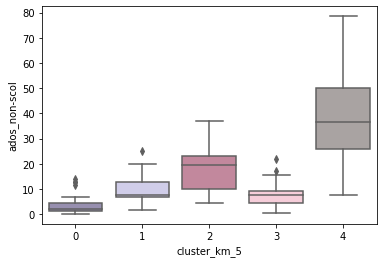

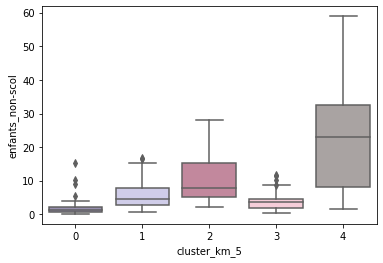

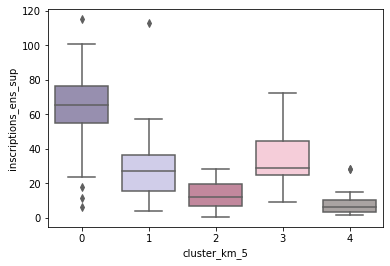

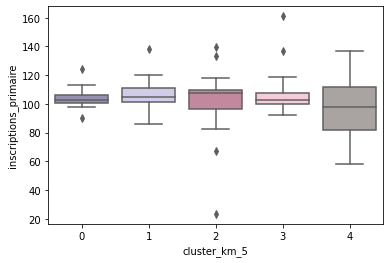

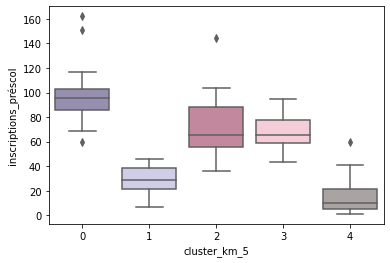

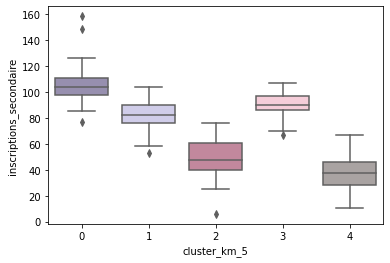

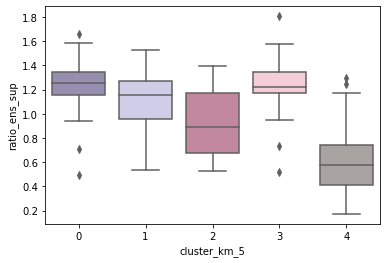

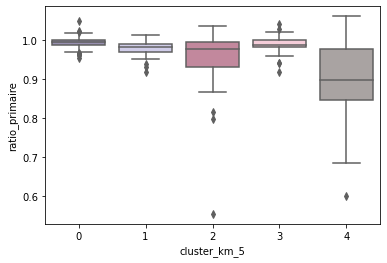

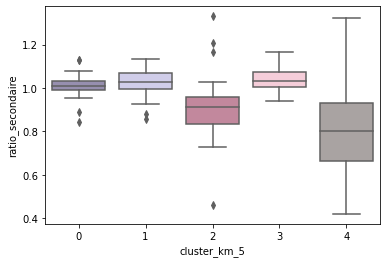

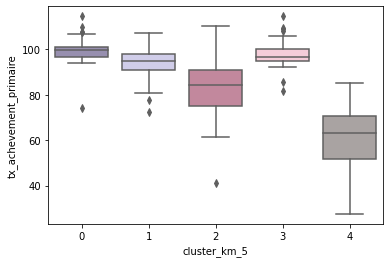

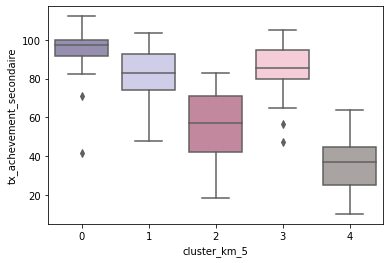

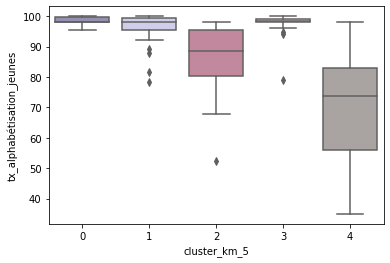

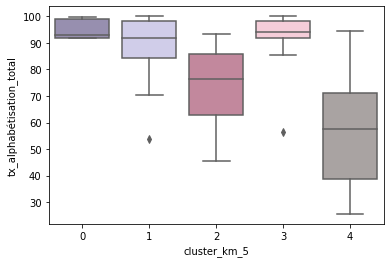

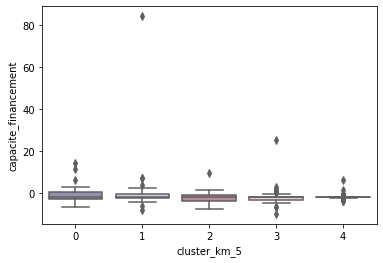

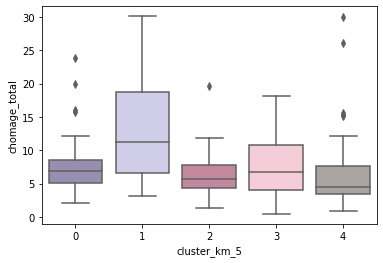

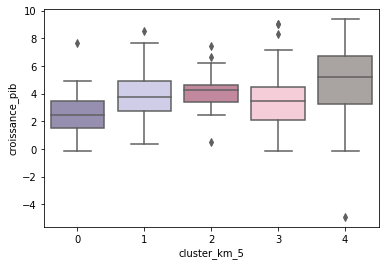

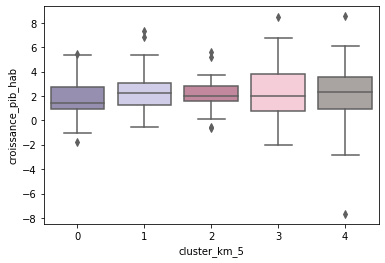

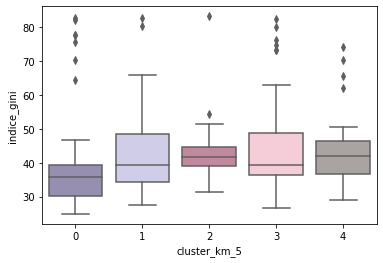

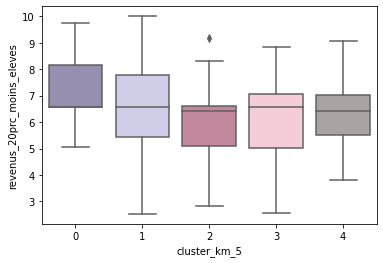

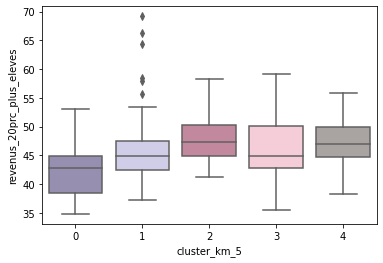

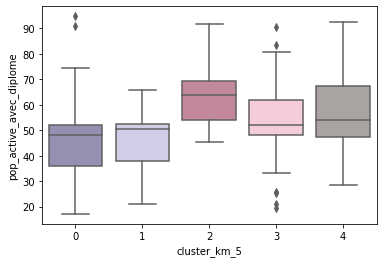

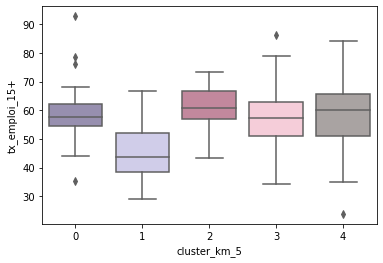

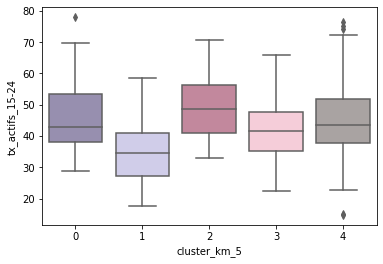

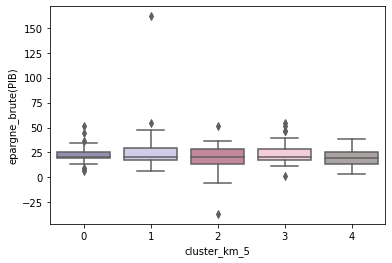

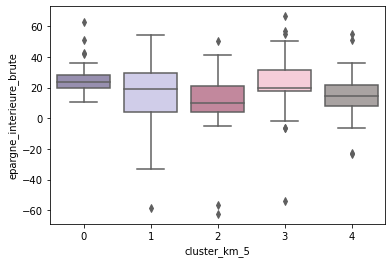

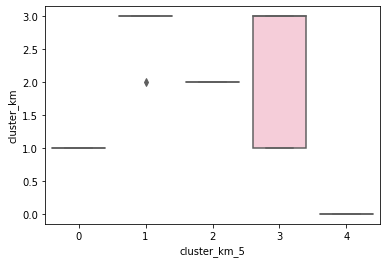

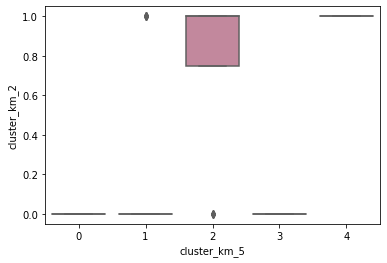

In [17]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#ccc8ee","#cc7e9b", "#fbc7d6", "#aaa2a1"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_km_5', y = i, data = data)
    plt.show()

In [18]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 1][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=9.893718609923278, pvalue=0.0016584389314154746)
Test de Welsch : Ttest_indResult(statistic=-6.702627592672166, pvalue=1.3317627872973605e-08)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=12.141880801921369, pvalue=0.0004930203048937507)
Test de Welsch : Ttest_indResult(statistic=-4.989603858945531, pvalue=7.28245837220638e-06)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=0.677369062041011, pvalue=0.41049415290575775)
Test de Welsch : Ttest_indResult(statistic=7.587242562133656, pvalue=4.8122831453700175e-11)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=13.606544615414093, pvalue=0.00022539837192573424)
Test de Welsch : Ttest_indResult(statistic=-1.2639118381390035, pvalue=0.21206648215452942)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=6.810184598773471, pvalue=0.009063939420584654)
Test de Welsch : Ttest_indResult(statistic=22.281892393115076, pvalue

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [19]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=30.715517708469104, pvalue=2.9876616267388515e-08)
Test de Welsch : Ttest_indResult(statistic=-7.1083807317674195, pvalue=5.073962544656074e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=31.739674872449918, pvalue=1.762839484130168e-08)
Test de Welsch : Ttest_indResult(statistic=-5.017488714567732, pvalue=5.742327202047516e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=16.437418703947046, pvalue=5.02827881357257e-05)
Test de Welsch : Ttest_indResult(statistic=13.104600138556394, pvalue=1.7018244939678507e-20)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=71.6135742468568, pvalue=2.6174977960194984e-17)
Test de Welsch : Ttest_indResult(statistic=0.4621274268669683, pvalue=0.649055403511721)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=4.229728258695523, pvalue=0.03972179974749971)
Test de Welsch : Ttest_indResult(statistic=3.671673449301367, pvalue=

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [20]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=5.1492166477565595, pvalue=0.023256862632486497)
Test de Welsch : Ttest_indResult(statistic=-5.59478037866462, pvalue=1.9170697370904762e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=0.01865051584813966, pvalue=0.8913731480221374)
Test de Welsch : Ttest_indResult(statistic=-3.3759179342841814, pvalue=0.0010320349504011636)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=8.428665005412096, pvalue=0.0036935141787418895)
Test de Welsch : Ttest_indResult(statistic=7.697143234093023, pvalue=1.920907020518572e-11)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=22.821073604721498, pvalue=1.7780533494085137e-06)
Test de Welsch : Ttest_indResult(statistic=-0.8736103464550146, pvalue=0.38487127867686677)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=5.2323832810388335, pvalue=0.02217013432577887)
Test de Welsch : Ttest_indResult(statistic=9.939019700570537, pvalue=

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [21]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 0][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=107.2158350127084, pvalue=3.9923402957100806e-25)
Test de Welsch : Ttest_indResult(statistic=-11.228624807797013, pvalue=4.77466813762671e-14)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=103.588444998764, pvalue=2.4902534376550795e-24)
Test de Welsch : Ttest_indResult(statistic=-8.590407397981862, pvalue=1.0627676346537175e-10)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=55.74270938647745, pvalue=8.260404960385306e-14)
Test de Welsch : Ttest_indResult(statistic=16.913055573600957, pvalue=1.454457724279267e-24)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=63.83542035917453, pvalue=1.3525966900119167e-15)
Test de Welsch : Ttest_indResult(statistic=2.0843991317544197, pvalue=0.04301656774169726)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=2.812560159899752, pvalue=0.0935290056917656)
Test de Welsch : Ttest_indResult(statistic=25.550245877243714, pvalue=

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [22]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 1][i]
    false = data.loc[data['cluster_km_5'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=6.323390476232672, pvalue=0.011915558669776437)
Test de Welsch : Ttest_indResult(statistic=-3.5365004470698795, pvalue=0.001487147431828912)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=5.414416903899208, pvalue=0.019971122504051694)
Test de Welsch : Ttest_indResult(statistic=-2.2961823751978008, pvalue=0.02947295115172442)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=12.02784142069517, pvalue=0.0005241173851911986)
Test de Welsch : Ttest_indResult(statistic=3.682795557540225, pvalue=0.0005458422042532088)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=23.13253664432668, pvalue=1.5121025039409632e-06)
Test de Welsch : Ttest_indResult(statistic=0.8322572281209619, pvalue=0.41414586119634567)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=16.317661852302898, pvalue=5.356239615498952e-05)
Test de Welsch : Ttest_indResult(statistic=-7.6627581659978, pvalue=8.06

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [23]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 1][i]
    false = data.loc[data['cluster_km_5'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=1.2278126137063339, pvalue=0.2678328547336344)
Test de Welsch : Ttest_indResult(statistic=2.301527250433497, pvalue=0.024542384224977985)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=13.579238374743865, pvalue=0.00022870101084104772)
Test de Welsch : Ttest_indResult(statistic=2.9909698305833476, pvalue=0.004311894423734537)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=3.2796841909773193, pvalue=0.07014242481384503)
Test de Welsch : Ttest_indResult(statistic=-1.5214913548517854, pvalue=0.13334615471845476)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=0.5836364867399036, pvalue=0.44489045392776616)
Test de Welsch : Ttest_indResult(statistic=0.376616342031743, pvalue=0.7074429905331809)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=0.47043349933103146, pvalue=0.492787806171592)
Test de Welsch : Ttest_indResult(statistic=-15.37680995024256, pvalue=1.15388308

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [24]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 1][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=46.6591316088221, pvalue=8.447243225687825e-12)
Test de Welsch : Ttest_indResult(statistic=-8.783625300540884, pvalue=2.2982151239090548e-11)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=41.277756868538084, pvalue=1.3206315102434317e-10)
Test de Welsch : Ttest_indResult(statistic=-6.586067677304896, pvalue=3.5150964648382734e-08)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=43.87057156852269, pvalue=3.5082431114839156e-11)
Test de Welsch : Ttest_indResult(statistic=6.053758308924565, pvalue=3.674316891692585e-07)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=16.8640710554954, pvalue=4.015452429731816e-05)
Test de Welsch : Ttest_indResult(statistic=2.546112550008412, pvalue=0.013576256547775684)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=0.9896147780445299, pvalue=0.3198365443278228)
Test de Welsch : Ttest_indResult(statistic=4.825241661335651, pvalue=7

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [25]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 2][i]
    false = data.loc[data['cluster_km_5'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=14.362318572963996, pvalue=0.0001507898852774478)
Test de Welsch : Ttest_indResult(statistic=4.916880403981153, pvalue=5.9444155614889385e-05)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=34.43213749537672, pvalue=4.41374896478934e-09)
Test de Welsch : Ttest_indResult(statistic=3.9936449466545563, pvalue=0.0006700380659725043)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=6.072536059801178, pvalue=0.01372996863544912)
Test de Welsch : Ttest_indResult(statistic=-7.070200744385395, pvalue=2.554048791221809e-09)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=23.24050632207644, pvalue=1.4295438729216465e-06)
Test de Welsch : Ttest_indResult(statistic=-0.6976629090259059, pvalue=0.4928359602558685)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=15.633541377121817, pvalue=7.687876607162164e-05)
Test de Welsch : Ttest_indResult(statistic=1.1298111172273715, pvalue=

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [26]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 2][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=12.165223821353251, pvalue=0.00048688822155416595)
Test de Welsch : Ttest_indResult(statistic=-5.585891466129542, pvalue=6.577272457485781e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=10.72646020318772, pvalue=0.0010561429190631107)
Test de Welsch : Ttest_indResult(statistic=-4.286717458228235, pvalue=6.9364446896373e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=4.255477338727115, pvalue=0.03912395142233382)
Test de Welsch : Ttest_indResult(statistic=2.945090518443559, pvalue=0.00645329276406977)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=1.5391478341065337, pvalue=0.2147446929186286)
Test de Welsch : Ttest_indResult(statistic=0.6331086756674797, pvalue=0.5312949293634155)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=10.942522897946876, pvalue=0.0009398211002245891)
Test de Welsch : Ttest_indResult(statistic=9.838631329882691, pvalue=5.499223

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [27]:
for i in cols:
    true = data.loc[data['cluster_km_5'] == 3][i]
    false = data.loc[data['cluster_km_5'] == 4][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=82.98584631470885, pvalue=8.264301269953375e-20)
Test de Welsch : Ttest_indResult(statistic=-9.774632397733544, pvalue=2.1644217194749533e-12)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=112.30619346429147, pvalue=3.061777465362091e-26)
Test de Welsch : Ttest_indResult(statistic=-7.885998368289258, pvalue=1.003290522701252e-09)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=30.60832951399957, pvalue=3.15735338102593e-08)
Test de Welsch : Ttest_indResult(statistic=11.983847033318666, pvalue=2.7441241765696554e-19)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=16.25792237045684, pvalue=5.52779707249815e-05)
Test de Welsch : Ttest_indResult(statistic=2.3599759728128813, pvalue=0.021796045506411583)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=0.1599403796166848, pvalue=0.6892114137293655)
Test de Welsch : Ttest_indResult(statistic=19.453696970465803, pvalue=

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


## Analyse des groupes obtenus par la CAH

In [28]:
data.groupby(['cluster_ddg']).describe().T

cluster_ddg                  1           2         3
ados_non-scol count  51.000000  152.000000   1.00000
              mean   32.137954    7.469451  17.92581
              std    19.960394    6.579449       NaN
              min     4.413385    0.061662  17.92581
              25%    12.806868    2.336579  17.92581
...                        ...         ...       ...
cluster_db    min    -1.000000   -1.000000  -1.00000
              25%    -1.000000    0.000000  -1.00000
              50%     0.000000    0.000000  -1.00000
              75%     0.500000    0.000000  -1.00000
              max     1.000000    0.000000  -1.00000

[232 rows x 3 columns]

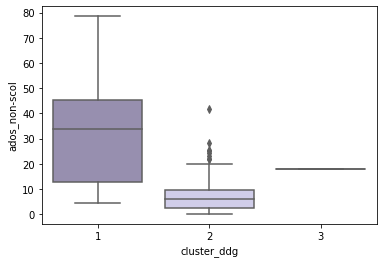

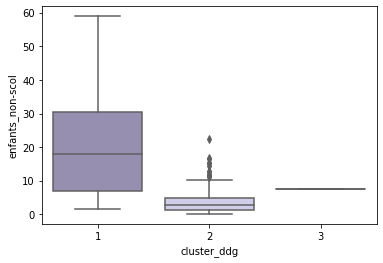

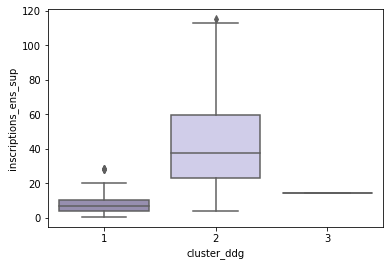

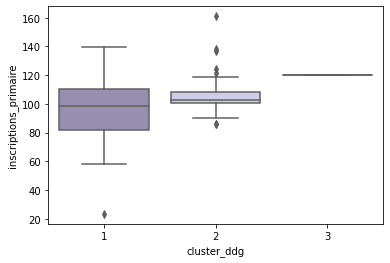

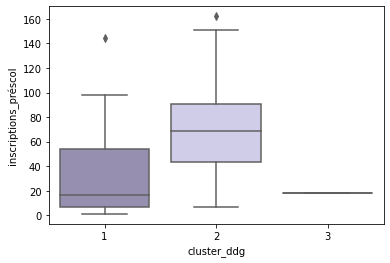

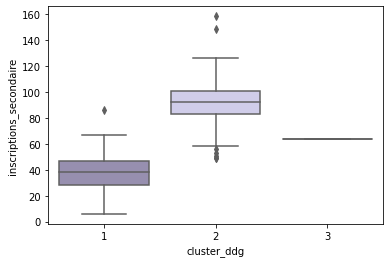

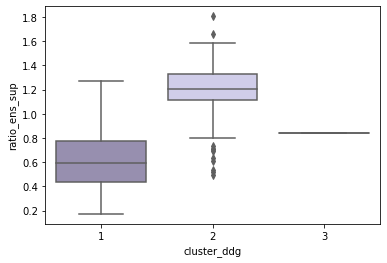

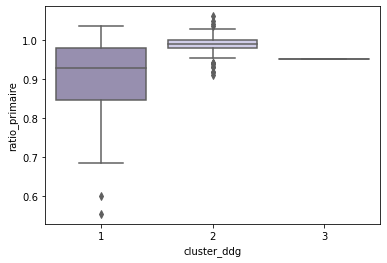

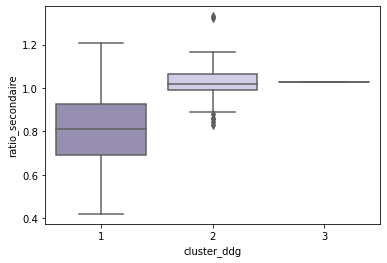

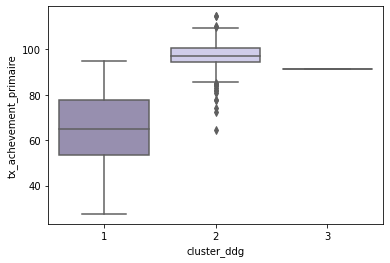

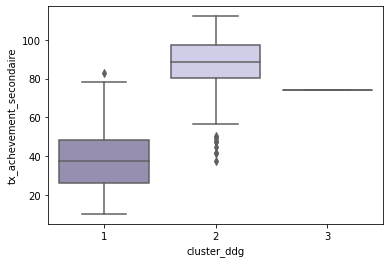

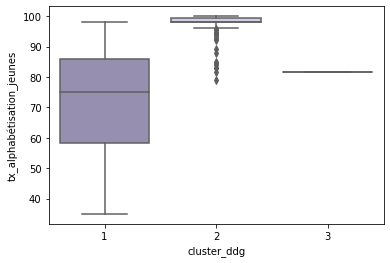

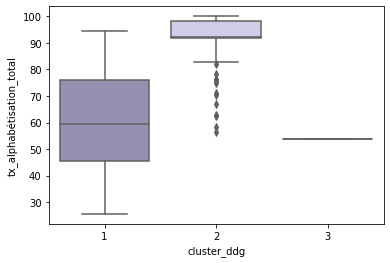

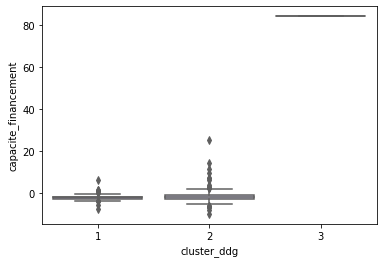

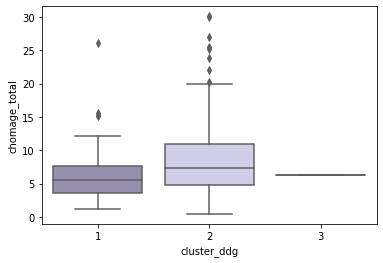

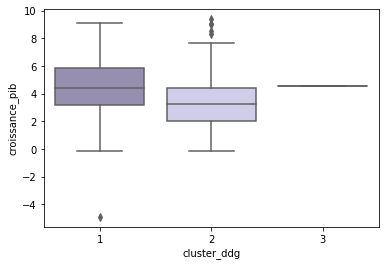

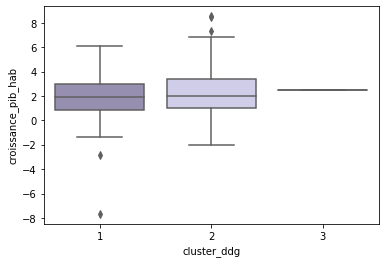

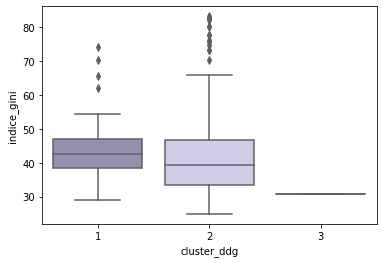

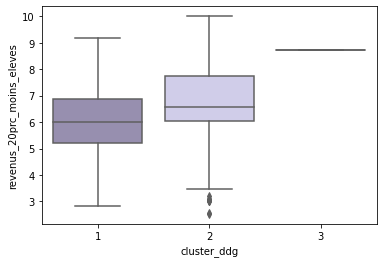

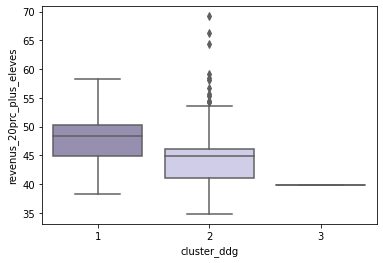

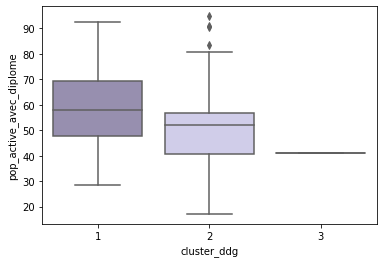

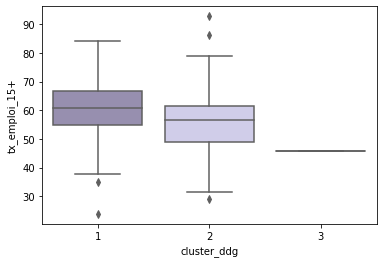

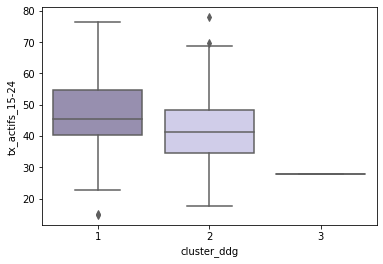

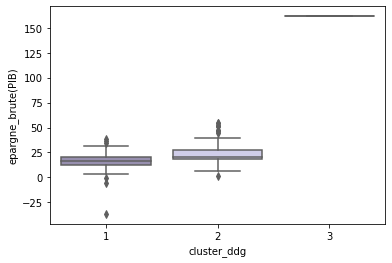

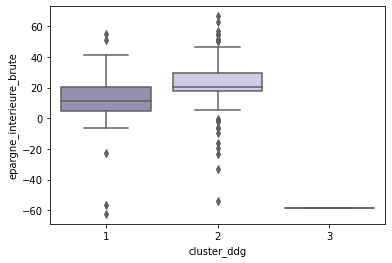

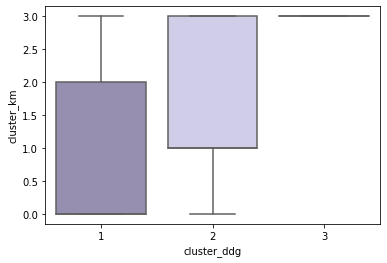

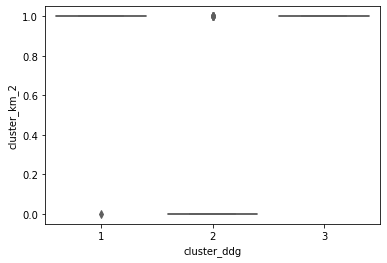

In [29]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#ccc8ee","#cc7e9b"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_ddg', y = i, data = data)
    plt.show()

In [30]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 2][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=16.913266714815663, pvalue=3.91271619393615e-05)
Test de Welsch : Ttest_indResult(statistic=-6.684148383775718, pvalue=8.095946931948935e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=33.917187670351076, pvalue=5.7508411171014375e-09)
Test de Welsch : Ttest_indResult(statistic=-4.898053658777746, pvalue=6.929719146215959e-05)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=21.017593534517143, pvalue=4.550851833710599e-06)
Test de Welsch : Ttest_indResult(statistic=11.928340984507802, pvalue=4.189166049642869e-20)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=89.97109492238327, pvalue=2.416650189433552e-21)
Test de Welsch : Ttest_indResult(statistic=0.33174958490945755, pvalue=0.7434349134233129)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=6.0845509353815315, pvalue=0.01363690252777337)
Test de Welsch : Ttest_indResult(statistic=3.138877052806514, pvalue

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [31]:
for i in cols:
    true = data.loc[data['cluster_km'] == 1][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=0.6515948565287961, pvalue=0.4195430532479655)
Test de Welsch : Ttest_indResult(statistic=-5.284844749540457, pvalue=4.952609525907221e-07)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=6.978754446816155, pvalue=0.008248299558029826)
Test de Welsch : Ttest_indResult(statistic=-4.641329645695542, pvalue=8.962194841048435e-06)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=10.350883127730443, pvalue=0.0012941275760647367)
Test de Welsch : Ttest_indResult(statistic=6.902568730601242, pvalue=1.9202571292907147e-10)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=34.30208555856596, pvalue=4.718758267664039e-09)
Test de Welsch : Ttest_indResult(statistic=-1.6645773229170615, pvalue=0.09936637520513478)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=0.1470116306428587, pvalue=0.7014076666637885)
Test de Welsch : Ttest_indResult(statistic=16.447655175817687, pvalue=3.1

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [32]:
for i in cols:
    true = data.loc[data['cluster_km'] == 2][i]
    false = data.loc[data['cluster_km'] == 3][i]
    print(i.capitalize())
    print('Test de Bartlett :', stats.bartlett(true,false))
    #print('Test de Student :', stats.ttest_ind(true,false, equal_var=True))
    print('Test de Welsch :', stats.ttest_ind(true,false, equal_var=False))

Ados_non-scol
Test de Bartlett : BartlettResult(statistic=11.507478061639109, pvalue=0.0006931675884861374)
Test de Welsch : Ttest_indResult(statistic=4.502028883705795, pvalue=0.00014550325391937433)
Enfants_non-scol
Test de Bartlett : BartlettResult(statistic=13.10835691891818, pvalue=0.00029398141435432837)
Test de Welsch : Ttest_indResult(statistic=3.1414205444052192, pvalue=0.004445916013237942)
Inscriptions_ens_sup
Test de Bartlett : BartlettResult(statistic=9.126525442714893, pvalue=0.0025192973136606007)
Test de Welsch : Ttest_indResult(statistic=-6.013992702193593, pvalue=9.551503476553182e-08)
Inscriptions_primaire
Test de Bartlett : BartlettResult(statistic=21.602596348789653, pvalue=3.353975034625634e-06)
Test de Welsch : Ttest_indResult(statistic=-0.7841708151528028, pvalue=0.4410226987166087)
Inscriptions_préscol
Test de Bartlett : BartlettResult(statistic=4.548916433907626, pvalue=0.03293958571950063)
Test de Welsch : Ttest_indResult(statistic=4.894705334173956, pvalue=4

D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
D:\Users\cecile\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


## Analyse des groupes obtenus par DBSCAN

In [33]:
data.groupby(['cluster_db']).describe().T

cluster_db                  -1           0          1
ados_non-scol count  48.000000  143.000000  13.000000
              mean   18.227675    8.738151  51.371850
              std    17.296903    8.516596  14.138669
              min     0.230077    0.061662  25.784990
              25%     7.598368    2.561399  44.565864
...                        ...         ...        ...
cluster_ddg   min     1.000000    1.000000   1.000000
              25%     1.000000    2.000000   1.000000
              50%     1.500000    2.000000   1.000000
              75%     2.000000    2.000000   1.000000
              max     3.000000    2.000000   1.000000

[232 rows x 3 columns]

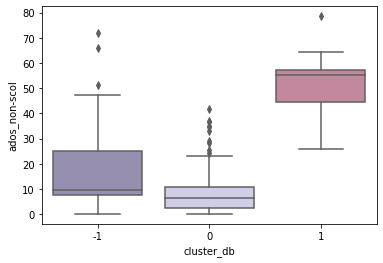

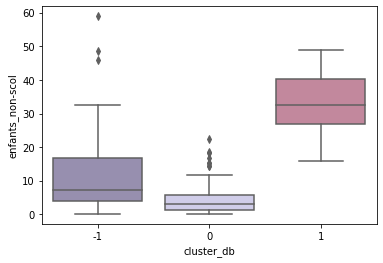

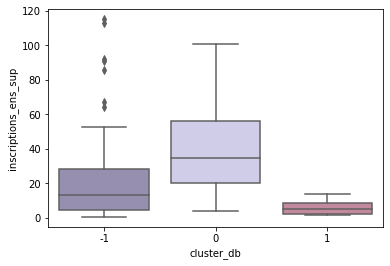

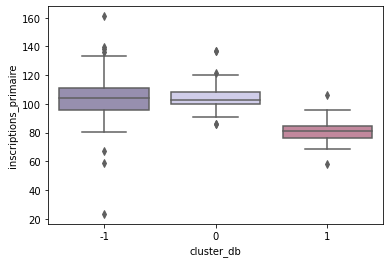

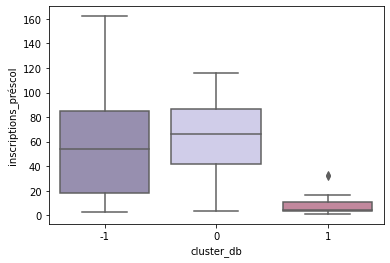

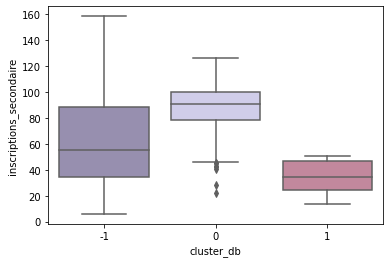

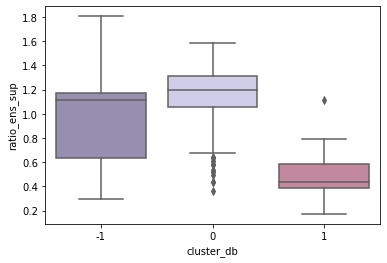

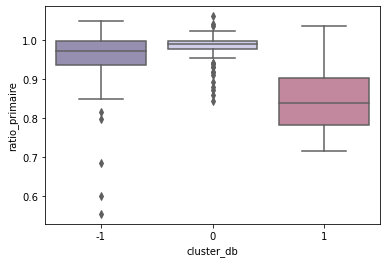

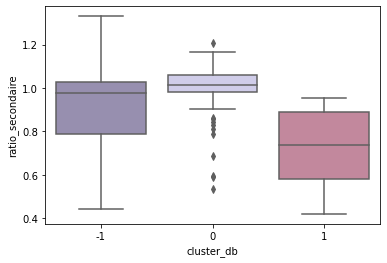

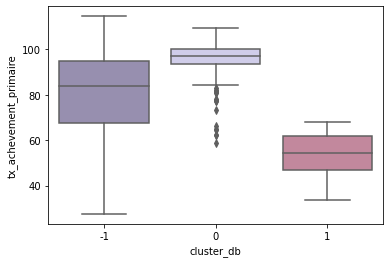

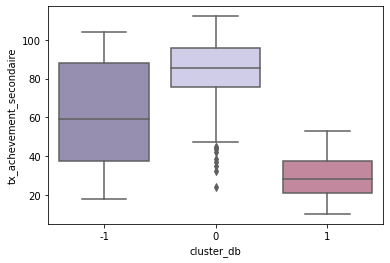

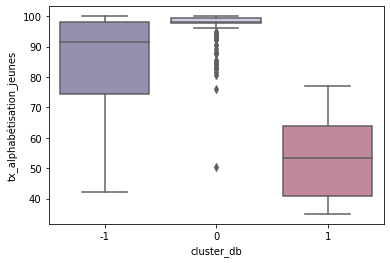

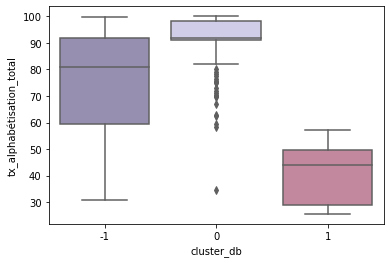

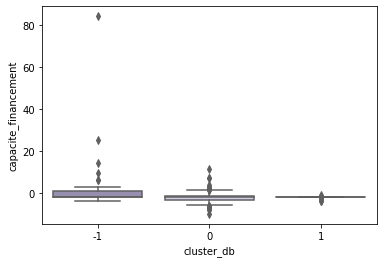

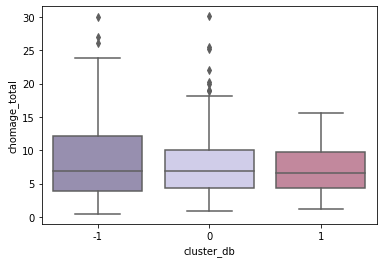

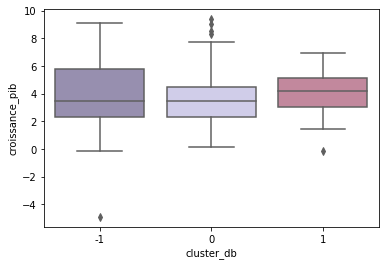

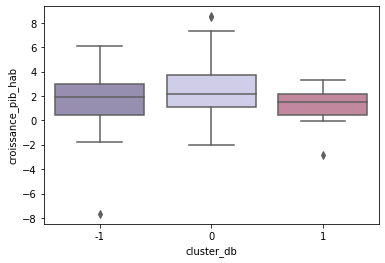

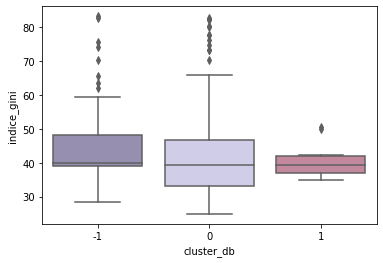

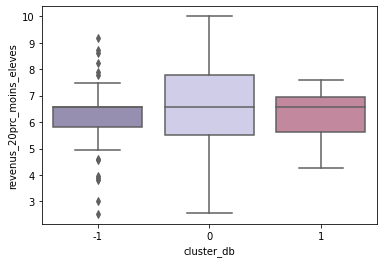

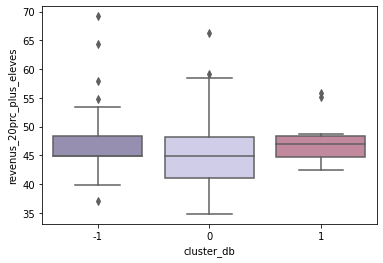

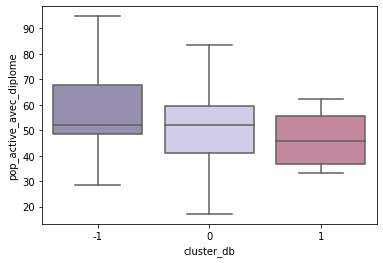

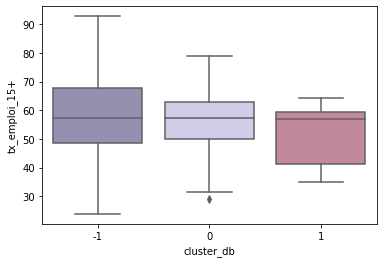

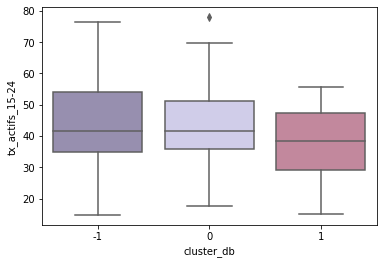

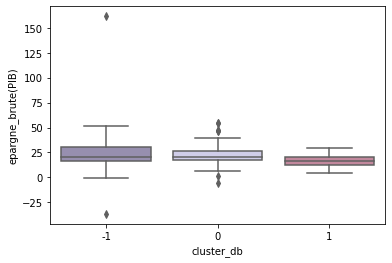

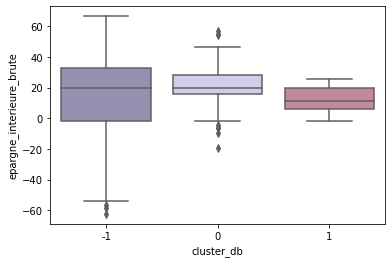

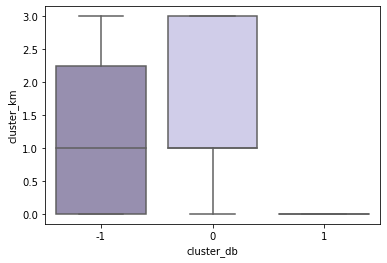

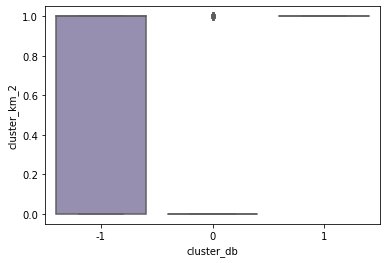

In [34]:
# Create an array with the colors you want to use
colors = ["#948ab4", "#ccc8ee","#cc7e9b", "#aaa2a1"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

for i in cols:
    sns.boxplot(x='cluster_db', y = i, data = data)
    plt.show()